## Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('data/multiTimeline.csv', skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


## Wrangle your data

In [4]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [5]:
df.reset_index(inplace=True)
df['month'] = pd.to_datetime(df['month'])
df = df.set_index('month')
df.head()

,index,diet,gym,finance
month,,,,
2004-01-01,0,100,31,48
2004-02-01,1,75,26,49
2004-03-01,2,67,24,47
2004-04-01,3,70,22,48
2004-05-01,4,72,22,43


In [10]:
df.drop('index', axis=1, inplace=True)
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


## A bit of EDA

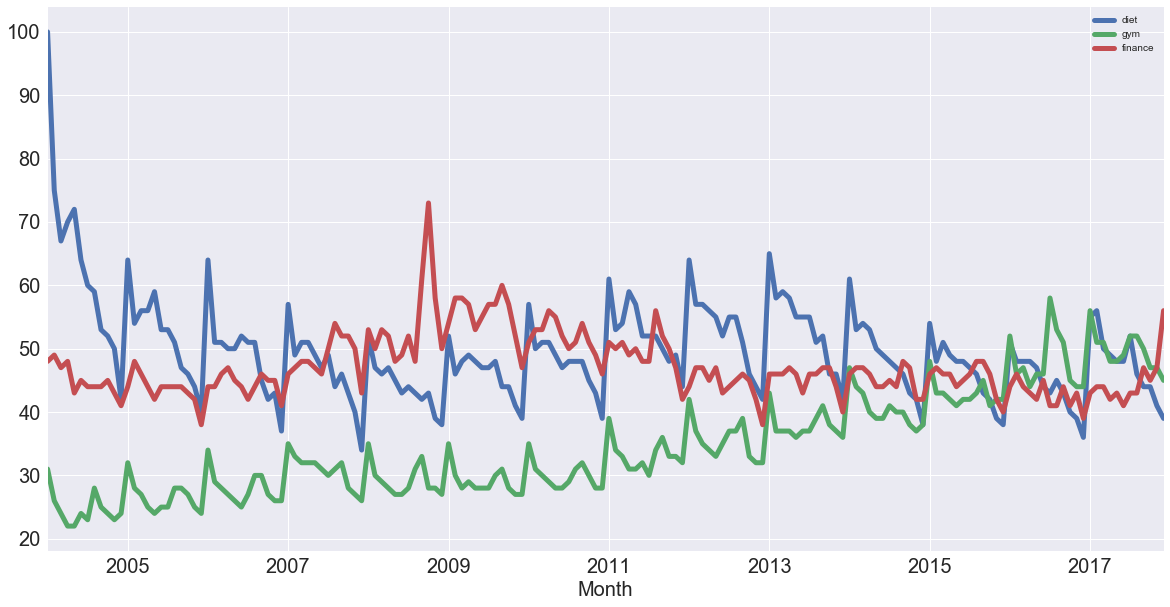

In [11]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20);
plt.xlabel('Month', fontsize=20);

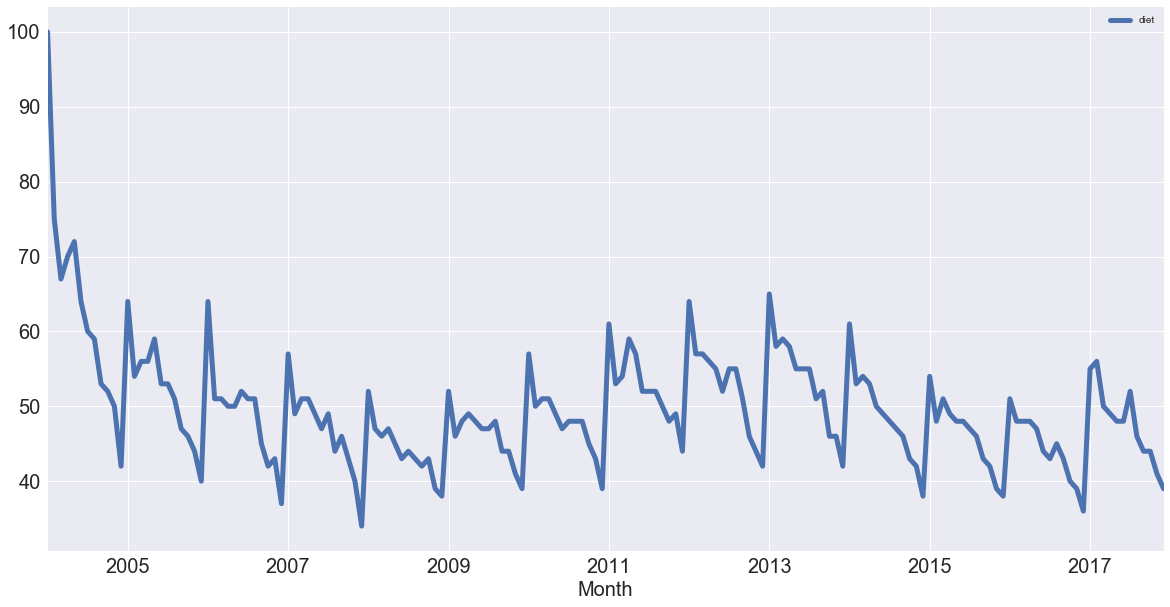

In [12]:
df[['diet']].plot(figsize=(20,10), linewidth=5, fontsize=20);
plt.xlabel('Month', fontsize=20);

## Is there a trend?

### Check out moving average:

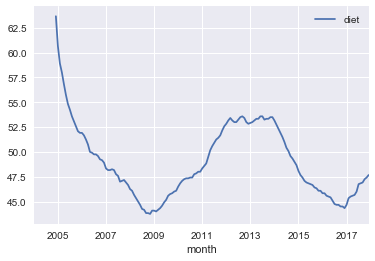

In [17]:
diet = df[['diet']]
diet.rolling(12).mean().plot();

## Check out differencing

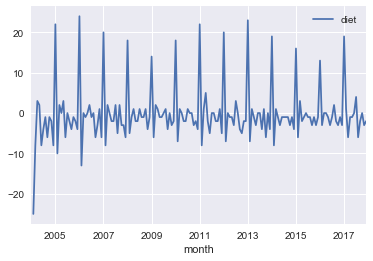

In [19]:
diet.diff().plot();

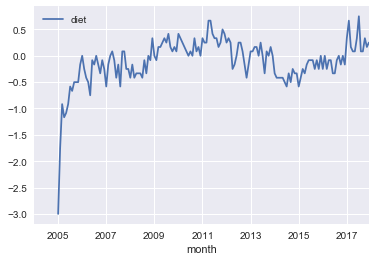

In [24]:
diet.diff().rolling(12).mean().plot();

Discuss _stationary time series_. Check this also: https://www.otexts.org/fpp/8/1

## Periodicity and Autocorrelation

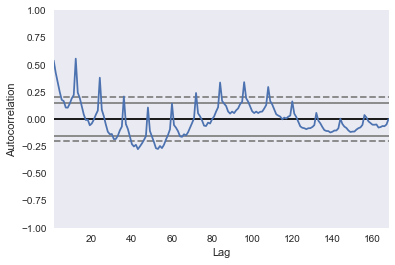

In [15]:
pd.plotting.autocorrelation_plot(diet);

### A detour on correlation

...

## Modeling time series

### Autoregressive model

...

### Moving average model

...

### ARIMA model

In [ ]:
diet = diet['diet']
diet = diet.apply( lambda x: float(x))

In [76]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(diet, order=(5,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.diet   No. Observations:                  167
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -535.676
Method:                       css-mle   S.D. of innovations              5.972
Date:                Fri, 15 Dec 2017   AIC                           1087.353
Time:                        22:22:37   BIC                           1112.297
Sample:                    02-01-2004   HQIC                          1097.477
                         - 12-01-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1982      0.146     -1.361      0.175      -0.484       0.087
ar.L1.D.diet     0.2724      0.140      1.949      0.053      -0.001       0.546
ar.L2.D.diet     0.1094      0.100      1.09

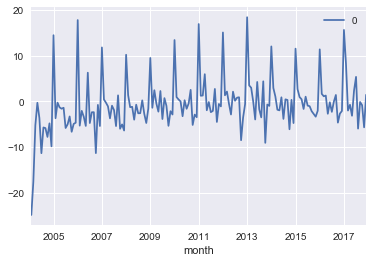

In [68]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot();

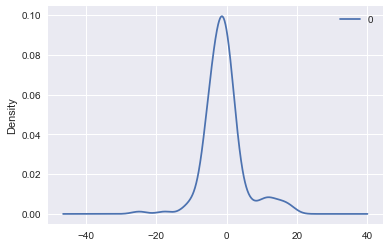

In [69]:
residuals.plot(kind='kde');

### Predictions

In [40]:
## Cf here: https://machinelearningmastery.com/make-sample-forecasts-arima-python/

In [46]:
forecast = model_fit.forecast()[0:10]
forecast

(array([ 41.08795341]),
 array([ 6.01752068]),
 array([[ 29.29382959,  52.88207723]]))

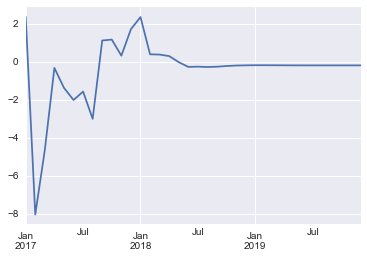

In [78]:
## not working yet !!
from pandas import datetime
start_index = datetime(2017, 1, 1)
end_index = datetime(2019, 12, 1)
forecast = model_fit.predict(start=start_index, end=end_index)
forecast.plot()

check this: https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/